In [1]:
import sqlite3
import pandas as pd
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pylab
import pandas as pd
import plotly.graph_objects as px


In [3]:
# conn=sqlite3.connect("E:\BTLTMDT\BTL_TMDT_D19\db.sqlite3")
conn=sqlite3.connect("db.sqlite3")

#1.viết hàm trả về tổng số lượng hóa đơn theo ngày (từ ngày a đến ngày b)

In [6]:
def funtion1(start_date="2022-01-17", end_date="2022-04-25",conn=conn):
    query=f"SELECT * FROM 'core_order' where ordered_date>='{start_date}' and ordered_date<='{end_date}' and ordered='1' order by start_date ASC"
    df=pd.read_sql_query(query, conn)
    df['ordered_date'] = pd.to_datetime(df['ordered_date'])
    df = df.set_index('ordered_date')
    total_order = df.groupby(pd.Grouper(freq='D')).size()
    days=total_order.keys().to_list()
    count= total_order.values.tolist()
    
    for i in range(len(days)):
        days[i] = str(pd.Timestamp(days[i]))[0:10]
    return days,count


days,count=funtion1()

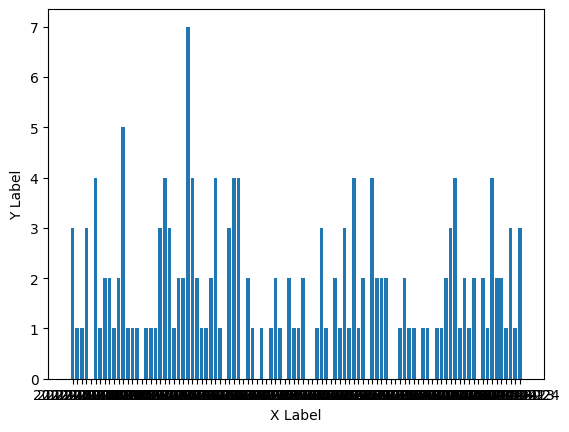

In [16]:
# Vẽ biểu đồ cột
plt.bar(days,count)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()

src/image_visualization/1681576882.png


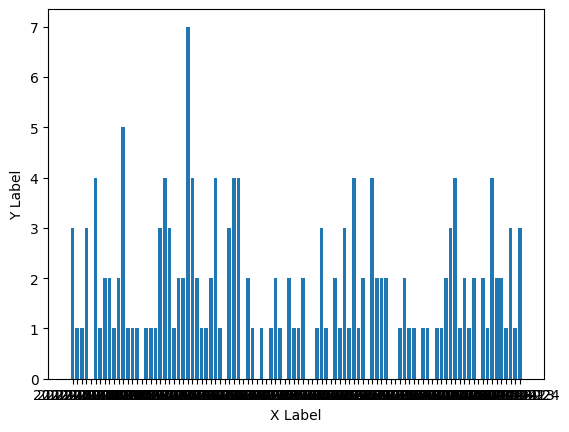

In [19]:
import time
# tạo đường dẫn cho file ảnh
folder_path = 'src/image_visualization/'  # thay đổi đường dẫn cho phù hợp
filename= int(time.time())
filename = str(filename)+".png"
save_path=folder_path+filename

plt.bar(days,count)
plt.xlabel('X Label')
plt.ylabel('Y Label')

print(save_path)
pylab.savefig(save_path)


#ham 2

In [62]:
def funtion2(year="2022",conn=conn):
    start_date=year+ "-01-01"
    end_date=year+ "-12-31"
    query=f"SELECT * FROM 'core_order' where ordered_date>='{start_date}' and ordered_date<='{end_date}' and ordered='1' order by start_date ASC"
    df=pd.read_sql_query(query, conn)
    df['ordered_date'] = pd.to_datetime(df['ordered_date'])
    
    df = df.set_index('ordered_date')
    total_order = df.groupby(pd.Grouper(freq='M')).size()
    months=total_order.keys().to_list()
    count= total_order.values.tolist()  
    my_dict= {'01': 0, '02': 0, '03': 0,  '04': 0, '05': 0, '06': 0,  '07': 0, '08': 0, '09': 0, '10': 0,'11': 0, '12': 0}
    for i in range(len(months)):
        months[i] = str(pd.Timestamp(months[i]))[5:7]
        my_dict[str(months[i] )]=count[i]
    return my_dict
my_dict=funtion2()
print(my_dict)

{'01': 106, '02': 168, '03': 162, '04': 177, '05': 192, '06': 206, '07': 217, '08': 210, '09': 164, '10': 182, '11': 177, '12': 201}


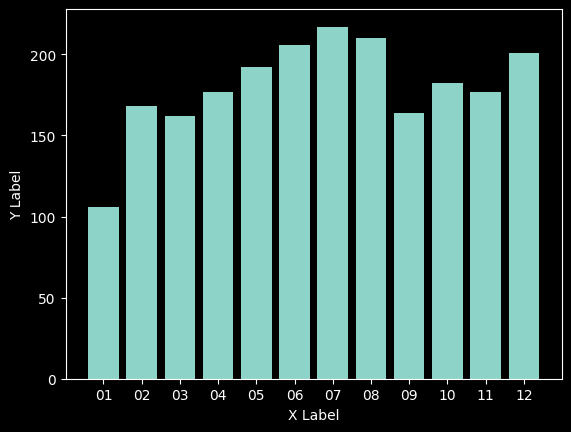

In [63]:
# Vẽ biểu đồ cột
plt.bar(my_dict.keys(),my_dict.values())
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()

#funtion3

In [64]:
def funtion3(start_year="2019",end_year="2022",conn=conn):
    start_date=start_year+ "-01-01"
    end_date=end_year+ "-12-31"
    query=f"SELECT * FROM 'core_order' where ordered_date>='{start_date}' and ordered_date<='{end_date}' and ordered='1' order by start_date ASC"
    df=pd.read_sql_query(query, conn)
    df['ordered_date'] = pd.to_datetime(df['ordered_date'])
    df = df.set_index('ordered_date')
    total_order = df.groupby(pd.Grouper(freq='Y')).size()
    my_dict={}
    for i in range(int(start_year),int(end_year)): 
        my_dict[str(i)]=0
    
    years=total_order.keys().to_list()
    count= total_order.values.tolist()

    for i in range(len(years)):
        years[i] = str(pd.Timestamp(years[i]))[0:4]
        my_dict[str(years[i])] =count[i]
    return my_dict
my_dict=funtion3()

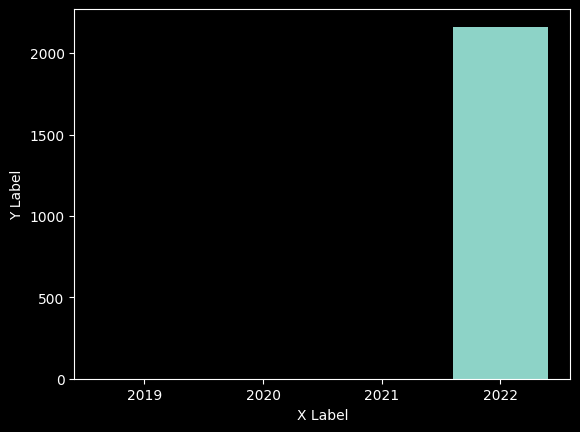

In [65]:
# Vẽ biểu đồ cột
plt.bar(my_dict.keys(),my_dict.values())
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.show()

4.  viết hàm trả về tổng doanh thu hóa đơn theo ngày (từ ngày a đến ngày b) 
5.  viết hàm trả về tổng doanh thu hóa đơn theo 12 tháng (chọn năm) 
6.  viết hàm trả về tổng doanh thu hóa đơn theo các năm.


#ham4

In [ ]:

def funtion4(start_date="2022-00-00",end_date="2023-00-00", conn=conn,flag="D"):
  query=f"SELECT 'core_order'.'id', 'core_order'.'ordered_date','core_payment'.'amount' FROM 'core_payment', 'core_order' where 'core_order'.'payment_id'='core_payment'.'id' and 'core_order'.'ordered'=1 and 'core_order'.'ordered_date'>='{start_date}' and 'core_order'.'ordered_date'<='{end_date}' order by start_date ASC"
  

In [29]:

def funtion4(start_date="2022-00-00",end_date="2023-00-00", conn=conn,flag='D'):
  query=f"SELECT 'core_order'.'id', 'core_order'.'ordered_date','core_payment'.'amount' FROM 'core_payment', 'core_order' where 'core_order'.'payment_id'='core_payment'.'id' and 'core_order'.'ordered'=1 and 'core_order'.'ordered_date'>='{start_date}' and 'core_order'.'ordered_date'<='{end_date}' order by start_date ASC"
  df=pd.read_sql_query(query, conn)
  # Chuyển đổi trường 'start_date' sang kiểu datetime
  df['ordered_date'] = pd.to_datetime(df['ordered_date'])
  if flag=='D' or flag=='d':
    df['date']=df['ordered_date'].dt.date
    time_amount = df.groupby('date')['amount'].sum()
  days=time_amount.keys().to_list()
  amount= time_amount.values.tolist()
  for i in range(len(days)):
        days[i] = str(days[i])
  
  print(type(time_amount))
  print(days,amount)
  return days,amount

funtion4()

<class 'pandas.core.series.Series'>
['2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22

(['2022-01-13',
  '2022-01-14',
  '2022-01-15',
  '2022-01-16',
  '2022-01-17',
  '2022-01-18',
  '2022-01-19',
  '2022-01-20',
  '2022-01-21',
  '2022-01-22',
  '2022-01-23',
  '2022-01-24',
  '2022-01-25',
  '2022-01-26',
  '2022-01-27',
  '2022-01-28',
  '2022-01-29',
  '2022-01-30',
  '2022-01-31',
  '2022-02-01',
  '2022-02-02',
  '2022-02-03',
  '2022-02-04',
  '2022-02-05',
  '2022-02-06',
  '2022-02-07',
  '2022-02-08',
  '2022-02-09',
  '2022-02-10',
  '2022-02-11',
  '2022-02-12',
  '2022-02-13',
  '2022-02-14',
  '2022-02-15',
  '2022-02-16',
  '2022-02-17',
  '2022-02-18',
  '2022-02-19',
  '2022-02-20',
  '2022-02-21',
  '2022-02-22',
  '2022-02-23',
  '2022-02-24',
  '2022-02-25',
  '2022-02-26',
  '2022-02-27',
  '2022-02-28',
  '2022-03-01',
  '2022-03-02',
  '2022-03-03',
  '2022-03-04',
  '2022-03-05',
  '2022-03-06',
  '2022-03-07',
  '2022-03-08',
  '2022-03-09',
  '2022-03-10',
  '2022-03-11',
  '2022-03-12',
  '2022-03-13',
  '2022-03-14',
  '2022-03-15',
  '2022-

#ham5

In [38]:

def funtion5(year="2022", conn=conn,flag='M'):
  start_date=year+"-01-01"
  end_date=year+"-12-31"
  query=f"SELECT 'core_order'.'id', 'core_order'.'ordered_date','core_payment'.'amount' FROM 'core_payment', 'core_order' where 'core_order'.'payment_id'='core_payment'.'id' and 'core_order'.'ordered'=1 and 'core_order'.'ordered_date'>='{start_date}' and 'core_order'.'ordered_date'<='{end_date}' order by start_date ASC"
  df=pd.read_sql_query(query, conn)
  # Chuyển đổi trường 'start_date' sang kiểu datetime
  df['ordered_date'] = pd.to_datetime(df['ordered_date'])

  df['month']=df['ordered_date'].dt.month
  time_amount = df.groupby('month')['amount'].sum()

  months=time_amount.keys().to_list()
  amount= time_amount.values.tolist()
  # months=total_order.keys().to_list()
  # count= total_order.values.tolist()  
  my_dict= {'1': 0, '2': 0, '3': 0,  '4': 0, '5': 0, '6': 0,  '7': 0, '8': 0, '9': 0, '10': 0,'11': 0, '12': 0}
  for i in range(len(months)):
      months[i] = str(months[i])
      my_dict[str(months[i])]=amount[i]
  return my_dict

funtion5()

{'1': 290500000.0,
 '2': 458800000.0,
 '3': 443900000.0,
 '4': 479800000.0,
 '5': 531100000.0,
 '6': 551900000.0,
 '7': 604000000.0,
 '8': 573400000.0,
 '9': 461100000.0,
 '10': 499100000.0,
 '11': 494800000.0,
 '12': 558600000.0}

#funtion6

In [42]:

def funtion6(start_year="2021",end_year="2027", conn=conn):
  start_date=start_year+"-01-01"
  end_date=end_year+"-12-31"
  query=f"SELECT 'core_order'.'id', 'core_order'.'ordered_date','core_payment'.'amount' FROM 'core_payment', 'core_order' where 'core_order'.'payment_id'='core_payment'.'id' and 'core_order'.'ordered'=1 and 'core_order'.'ordered_date'>='{start_date}' and 'core_order'.'ordered_date'<='{end_date}' order by start_date ASC"
  
  df=pd.read_sql_query(query, conn)
  # Chuyển đổi trường 'start_date' sang kiểu datetime
  df['ordered_date'] = pd.to_datetime(df['ordered_date'])
  df['year'] = df['ordered_date'].dt.year
  time_amount = df.groupby('year')['amount'].sum()
  
  my_dict={}
  for i in range(int(start_year),int(end_year)): 
      my_dict[str(i)]=0
  years=time_amount.keys().to_list()
  amount= time_amount.values.tolist()
  

  for i in range(len(years)):
      years[i] = str(years[i])
      my_dict[str(years[i])] =amount[i]
 
  return my_dict

funtion6()

{'2021': 0,
 '2022': 5967600000.0,
 '2023': 1673300000.0,
 '2024': 0,
 '2025': 0,
 '2026': 0}

#funtion7

In [4]:
def count_ordered_by_month(year="2022"):
    start_date=year+"-01-01"
    end_date=year+"-12-31"
    print(start_date)
    query=f"select core_order.id, ordered_date,ordered, amount from core_order, core_payment where ordered_date>='{start_date}' and ordered_date<='{end_date}' and core_order.payment_id=core_payment.id"
    df=pd.read_sql(query,conn)
    df['ordered_date'] = pd.to_datetime(df['ordered_date'])
    df['order_date'] = df['ordered_date'].dt.month

    # Thống kê số lượng ordered bằng 1 và 0 theo ngày
    order_summary = df.groupby(['order_date', 'ordered'])['id'].count().reset_index()
    order_summary_pivot = pd.pivot_table(order_summary, values='id', index='order_date', columns='ordered', fill_value=0)
    # print(order_summary_pivot)
    # order_summary_pivot.plot(kind='bar', stacked=False)
    my_dict_0= {'1': 0, '2': 0, '3': 0,  '4': 0, '5': 0, '6': 0,  '7': 0, '8': 0, '9': 0, '10': 0,'11': 0, '12': 0}    
    my_dict_1= {'1': 0, '2': 0, '3': 0,  '4': 0, '5': 0, '6': 0,  '7': 0, '8': 0, '9': 0, '10': 0,'11': 0, '12': 0}  
    for o in range(len(order_summary_pivot)):
      my_dict_0[str(order_summary_pivot.index[o])]=order_summary_pivot[0].values[o]
      my_dict_1[str(order_summary_pivot.index[o])]=order_summary_pivot[1].values[o]
    return my_dict_0 , my_dict_1
count_ordered_by_month()

2022-01-01


({'1': 57,
  '2': 52,
  '3': 58,
  '4': 57,
  '5': 51,
  '6': 54,
  '7': 47,
  '8': 48,
  '9': 40,
  '10': 49,
  '11': 58,
  '12': 44},
 {'1': 59,
  '2': 55,
  '3': 43,
  '4': 45,
  '5': 51,
  '6': 52,
  '7': 42,
  '8': 54,
  '9': 60,
  '10': 46,
  '11': 48,
  '12': 44})

2022-01-01
{'1': 57, '2': 52, '3': 58, '4': 57, '5': 51, '6': 54, '7': 47, '8': 48, '9': 40, '10': 49, '11': 58, '12': 44} {'1': 59, '2': 55, '3': 43, '4': 45, '5': 51, '6': 52, '7': 42, '8': 54, '9': 60, '10': 46, '11': 48, '12': 44}


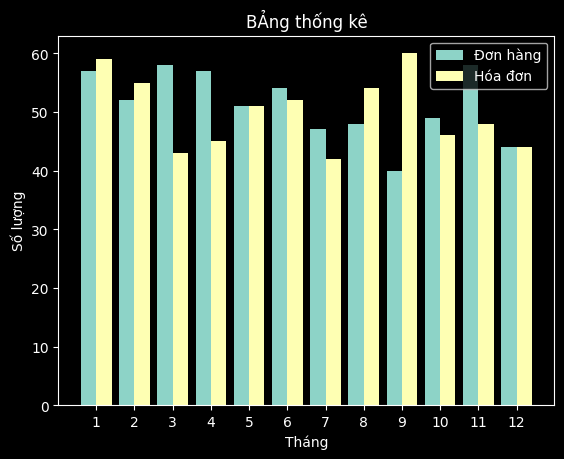

In [5]:
my_dict_0 , my_dict_1=count_ordered_by_month()
print(my_dict_0 , my_dict_1)
X=my_dict_0.keys()
order_date=my_dict_0.values()
ordered=my_dict_1.values()
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, order_date, 0.4, label = 'Đơn hàng')
plt.bar(X_axis + 0.2, ordered, 0.4, label = 'Hóa đơn')
plt.xticks(X_axis, X)
plt.xlabel("Tháng")
plt.ylabel("Số lượng")
plt.title("BẢng thống kê")
plt.legend()
plt.show()

#funtion 8

In [11]:
def count_ordered_by_year(year="2022"):
    start_date=year+"-01-01"
    end_date=year+"-12-31"
    query=f"select core_order.id, ordered_date,ordered, amount from core_order, core_payment where ordered_date>='{start_date}' and ordered_date<='{end_date}' and core_order.payment_id=core_payment.id"
    df=pd.read_sql(query,conn)
    # Chuyển đổi cột "ordered_date" sang định dạng datetime
    df['ordered_date'] = pd.to_datetime(df['ordered_date'])
    df['month'] = df['ordered_date'].dt.month
    # Nhóm dữ liệu theo "year" và "ordered" và tính tổng số đơn hàng và tổng số tiền
    result = df.groupby(['month', 'ordered']).agg({'ordered': 'count', 'amount': 'sum'})
    result = result.rename(columns={'ordered': 'count'})
    months = result.index.get_level_values('month').unique().tolist()
    revenues_ordered_0 = result[result.index.get_level_values('ordered')==0]['amount'].groupby('month').sum().tolist()
    revenues_ordered_1 = result[result.index.get_level_values('ordered')==1]['amount'].groupby('month').sum().tolist()
    my_dict_0= {'1': 0, '2': 0, '3': 0,  '4': 0, '5': 0, '6': 0,  '7': 0, '8': 0, '9': 0, '10': 0,'11': 0, '12': 0}
    my_dict_1= {'1': 0, '2': 0, '3': 0,  '4': 0, '5': 0, '6': 0,  '7': 0, '8': 0, '9': 0, '10': 0,'11': 0, '12': 0}

    for i in range(len(months)):
        months[i] = str(months[i])
        my_dict_0[str(months[i])]=revenues_ordered_0[i]
        my_dict_1[str(months[i])]=revenues_ordered_1[i]
    return my_dict_0, my_dict_1

count_ordered_by_year()

({'1': 156800000.0,
  '2': 147700000.0,
  '3': 165000000.0,
  '4': 147500000.0,
  '5': 140700000.0,
  '6': 146900000.0,
  '7': 143800000.0,
  '8': 132700000.0,
  '9': 99700000.0,
  '10': 136800000.0,
  '11': 159300000.0,
  '12': 124600000.0},
 {'1': 163600000.0,
  '2': 145900000.0,
  '3': 121600000.0,
  '4': 127200000.0,
  '5': 138000000.0,
  '6': 149200000.0,
  '7': 118600000.0,
  '8': 160100000.0,
  '9': 167600000.0,
  '10': 135700000.0,
  '11': 131000000.0,
  '12': 117200000.0})

2022-01-01
{'1': 57, '2': 52, '3': 58, '4': 57, '5': 51, '6': 54, '7': 47, '8': 48, '9': 40, '10': 49, '11': 58, '12': 44} {'1': 59, '2': 55, '3': 43, '4': 45, '5': 51, '6': 52, '7': 42, '8': 54, '9': 60, '10': 46, '11': 48, '12': 44}


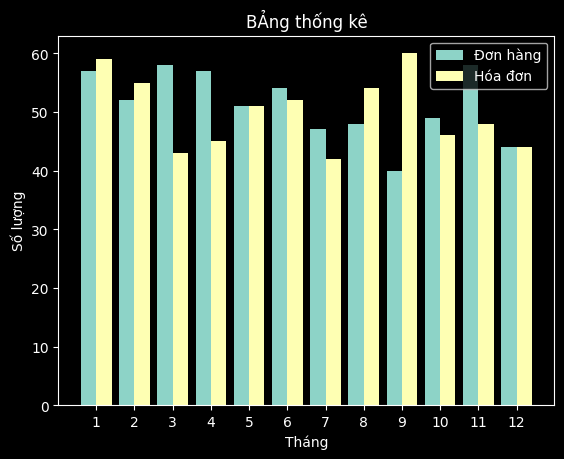

In [12]:
my_dict_0 , my_dict_1=count_ordered_by_month()
print(my_dict_0 , my_dict_1)
X=my_dict_0.keys()
order_date=my_dict_0.values()
ordered=my_dict_1.values()
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, order_date, 0.4, label = 'Đơn hàng')
plt.bar(X_axis + 0.2, ordered, 0.4, label = 'Hóa đơn')
plt.xticks(X_axis, X)
plt.xlabel("Tháng")
plt.ylabel("Số lượng")
plt.title("BẢng thống kê")
plt.legend()
plt.show()

#funtion9

In [55]:
def product_trend(year="2022", quantity=5):
  import json
  start_date=year+"-01-01"
  end_date=year+"-12-31"
  query=f"""SELECT core_item.title, SUM(core_orderitem.quantity) AS total_quantity
            FROM core_order_items
            INNER JOIN core_orderitem ON core_orderitem.id = core_order_items.orderitem_id
            INNER JOIN core_item ON core_orderitem.item_id = core_item.id
            INNER JOIN core_order ON core_order.id = core_order_items.order_id
            WHERE core_order.ordered_date BETWEEN '{start_date}' AND '{end_date}'
            AND core_order.ordered= '1'
            GROUP BY core_item.title
            ORDER BY total_quantity DESC
            LIMIT {quantity};
        """
  df=pd.read_sql(query, conn)
  df = df.reset_index(drop=True)
  title  =df["title"].to_list()
  total_quantity = df["total_quantity"].to_list()
  my_dict = {key: value for key, value in zip(title, total_quantity)}
  return my_dict

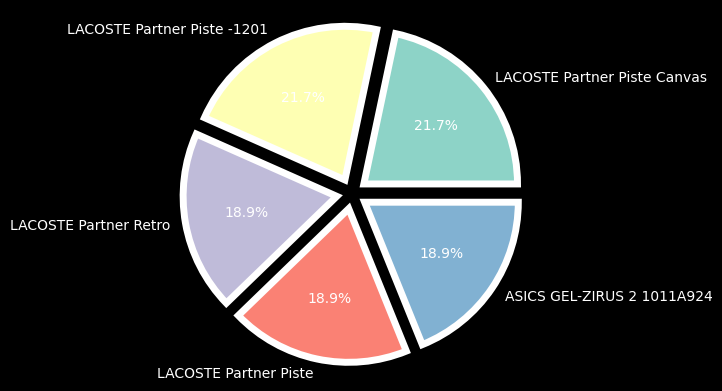

In [65]:
my_dict=product_trend()


import matplotlib.pyplot as plt
title =my_dict.keys()
total_quantity = my_dict.values()
explode = [0.1]*len(title)
  
plt.pie(total_quantity, explode = explode, labels = title,
        autopct = '%1.1f%%',startangle = 0,
        wedgeprops = {"edgecolor" : "white",
                    'linewidth' : 5,
                    'antialiased': True})
plt.axis('equal') 
  
plt.show()

#funtion 10

In [69]:
def product_trend_label(year="2022", quantity=5):
  import json
  start_date=year+"-01-01"
  end_date=year+"-12-31"
  query=f"""SELECT core_item.label, SUM(core_orderitem.quantity) AS total_quantity
            FROM core_order_items
            INNER JOIN core_orderitem ON core_orderitem.id = core_order_items.orderitem_id
            INNER JOIN core_item ON core_orderitem.item_id = core_item.id
            INNER JOIN core_order ON core_order.id = core_order_items.order_id
            WHERE core_order.ordered_date BETWEEN '{start_date}' AND '{end_date}'
            AND core_order.ordered= '1'
            GROUP BY core_item.title
            ORDER BY total_quantity DESC
            LIMIT {quantity};
        """
  df=pd.read_sql(query, conn)
  df = df.reset_index(drop=True)
  title  =df["label"].to_list()
  total_quantity = df["total_quantity"].to_list()
  my_dict = {key: value for key, value in zip(title, total_quantity)}
  return my_dict

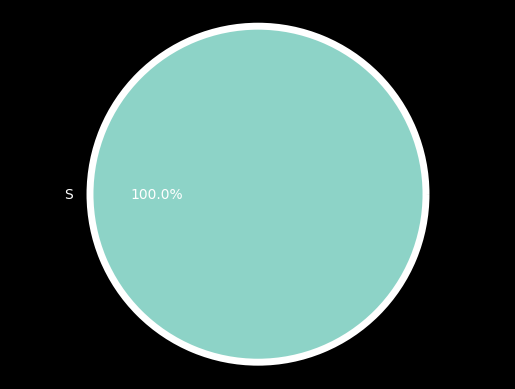

In [70]:
my_dict=product_trend_label()


import matplotlib.pyplot as plt
title =my_dict.keys()
total_quantity = my_dict.values()
explode = [0.1]*len(title)
  
plt.pie(total_quantity, explode = explode, labels = title,
        autopct = '%1.1f%%',startangle = 0,
        wedgeprops = {"edgecolor" : "white",
                    'linewidth' : 5,
                    'antialiased': True})
plt.axis('equal') 
  
plt.show()

# funtion 11

In [17]:
def funtion11(year="2022",quantity=20):
    start_date=year+"-01-01"
    end_date=year+"-12-31"
    query=f"""
        select core_order.ordered_date, user_id, auth_user.username, auth_user.first_name, auth_user.last_name from core_order 
        inner join auth_user on core_order.user_id=auth_user.id 
        where ordered_date BETWEEN '{start_date}' and '{end_date}' and is_staff='0' and is_active='1' and ordered='1'
        """
    df=pd.read_sql(query,conn)
    # Đếm số lần xuất hiện của mỗi giá trị trong cột user_id
    top_users = df['user_id'].value_counts().head(quantity).index
    user_counts = df['user_id'].value_counts().head(quantity)
    # Lấy thông tin của 5 khách hàng xuất hiện nhiều nhất trong bảng
    result = df.loc[df['user_id'].isin(top_users), ['user_id', 'username', 'first_name', 'last_name']].drop_duplicates()
    result = result.reset_index(drop=True)
    dict_data = result.to_dict(orient='records')
    userid,counts,username=[],[],[]
    # Thêm số lần xuất hiện của từng user vào dict_data
    for i, user in enumerate(dict_data):
        user_id = user['user_id']
        userid.append(user_id)
        counts.append(user_counts[user_id])
        username.append(user['username'])   
    my_dict = {key: value for key, value in zip(username, counts)}
    return my_dict
# funtion11()

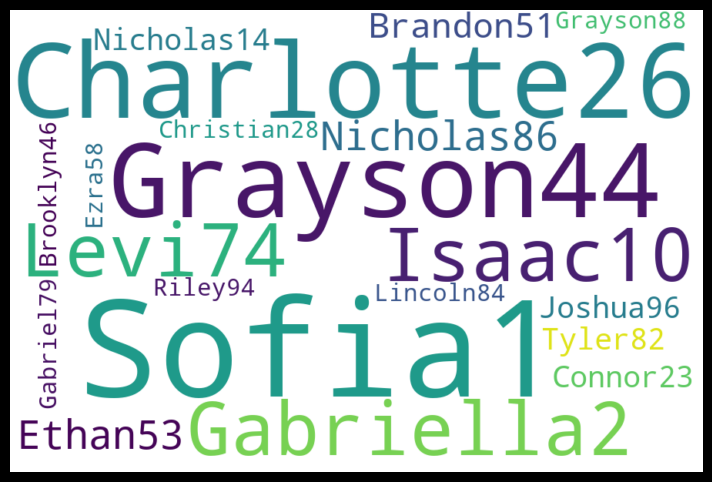

In [20]:
dic=funtion11()
k=list(dic.keys())
v=list(dic.values())
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(margin=5,width=900, height=600,background_color='white')
wc.generate_from_frequencies(dic)
# wc.to_file('wordcloud2.png')

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
# plt.savefig('foo.png')

plt.axis('off')
plt.show()

#funtion12

In [33]:
def revenue_from_customer_potential(year="2022",quantity=20):
  start_date=year+"-01-01"
  end_date=year+"-12-31"
  query=f"""SELECT core_payment.user_id,core_payment.amount , auth_user.username, auth_user.first_name, auth_user.last_name, core_order.ordered_date  FROM 'core_payment' 
          inner join auth_user on auth_user.id=core_payment.user_id
          inner join core_order on core_order.payment_id=core_payment.id
          where core_order.ordered_date between '{start_date}' and '{end_date}' and ordered='1';"""
  df=pd.read_sql(query, conn)
    # Nhóm các hàng cùng user_id và tính tổng amount
  grouped = df.groupby('user_id').agg({'amount': 'sum'}).reset_index()

  # Tìm ra 5 khách hàng có tổng amount lớn nhất
  top_5 = grouped.nlargest(quantity, 'amount')

  # Lấy ra thông tin user_id, username, first_name, last_name của các khách hàng đó
  result = df.loc[df['user_id'].isin(top_5['user_id'])][['user_id', 'username', 'first_name', 'last_name']].drop_duplicates()
  result = result.merge(top_5, on='user_id').sort_values(by='amount', ascending=False)
  result = result.reset_index(drop=True)
  
  data_result=result[['username','amount']]
  username=list(data_result['username'])
  amount=list(data_result['amount'])
  my_dict = {key: value for key, value in zip(username, amount)}
  return my_dict
revenue_from_customer_potential()


{'Charlotte26': 32700000.0,
 'Levi74': 30500000.0,
 'Sofia1': 29800000.0,
 'Grayson44': 29600000.0,
 'Gabriella2': 28300000.0,
 'Connor23': 26900000.0,
 'Brandon51': 26600000.0,
 'Isaac10': 26600000.0,
 'Ethan53': 26600000.0,
 'Tyler82': 25500000.0,
 'Julian89': 25500000.0,
 'Nicholas14': 24600000.0,
 'Skylar53': 24400000.0,
 'Ezra58': 24000000.0,
 'Gianna87': 23900000.0,
 'Gabriel79': 23800000.0,
 'Mia56': 23400000.0,
 'Lincoln84': 23400000.0,
 'Nicholas86': 23200000.0,
 'Grayson88': 22800000.0}

In [25]:
dic=revenue_from_customer_potential()
k=list(dic.keys())
v=list(dic.values())
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(margin=5,width=900, height=600,background_color='white')
wc.generate_from_frequencies(dic)
# wc.to_file('wordcloud2.png')

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
# plt.savefig('foo.png')

plt.axis('off')
plt.show()

AttributeError: 'list' object has no attribute 'keys'